In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

**Loading Dataset**

In [3]:
df = pd.read_csv('/Users/mehakklunkar/Downloads/ML Study Material/knn_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

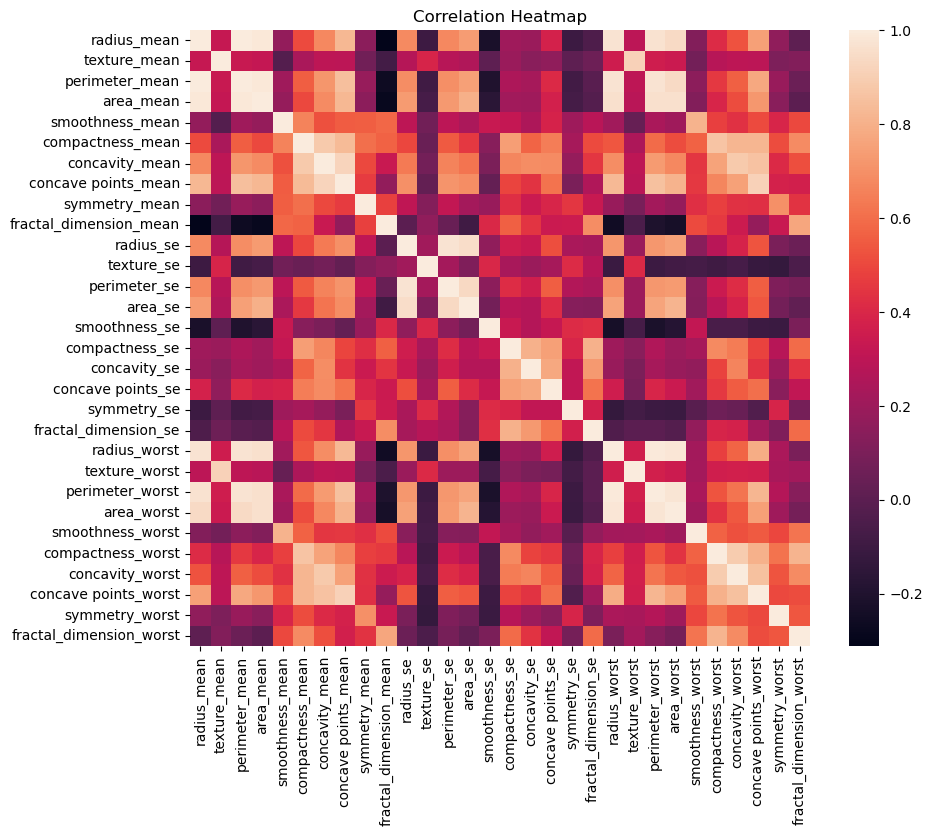

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr())
plt.title('Correlation Heatmap')
plt.show()

**Elbow Method:**

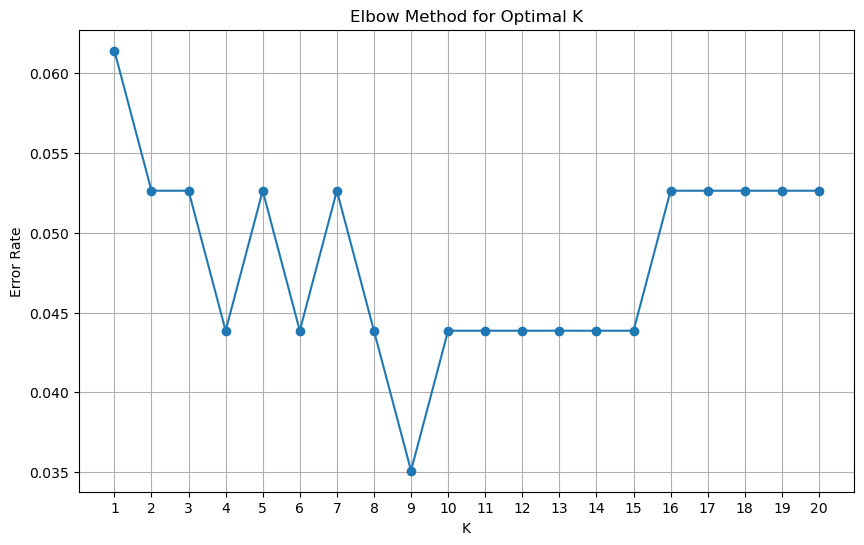

In [13]:
k_values = range(1, 21)
errors = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [14]:
optimal_k = 7
model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
print("Training Score:", model.score(X_train, y_train))
print("Testing Score:", model.score(X_test, y_test))

Training Score: 0.9692307692307692
Testing Score: 0.9473684210526315


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


**Confusion Matrix:**

<Figure size 800x600 with 0 Axes>

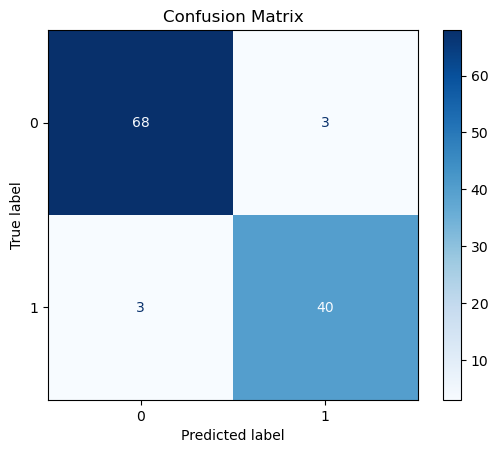

In [19]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

**2D Decision Boundary Plot:**

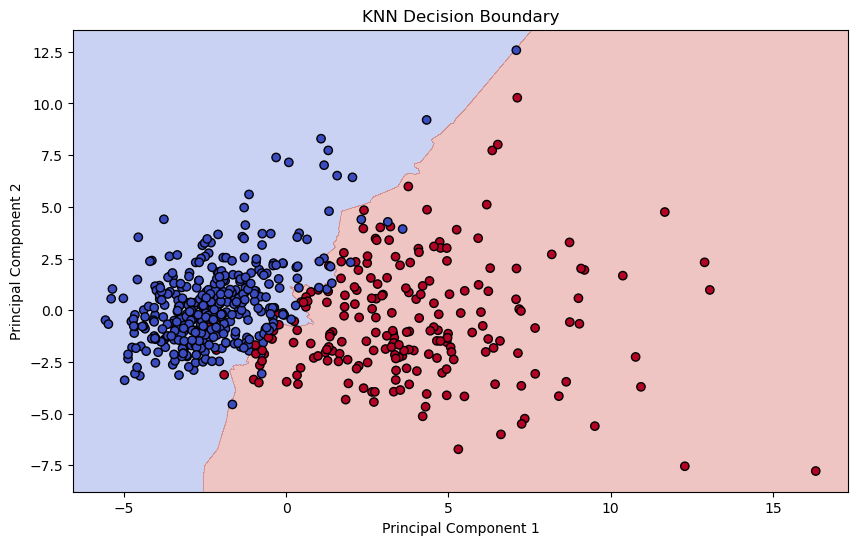

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=optimal_k)
model.fit(X_train_pca, y_train)

xx, yy = np.meshgrid(np.arange(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 0.01),
                     np.arange(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='coolwarm')
plt.title('KNN Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

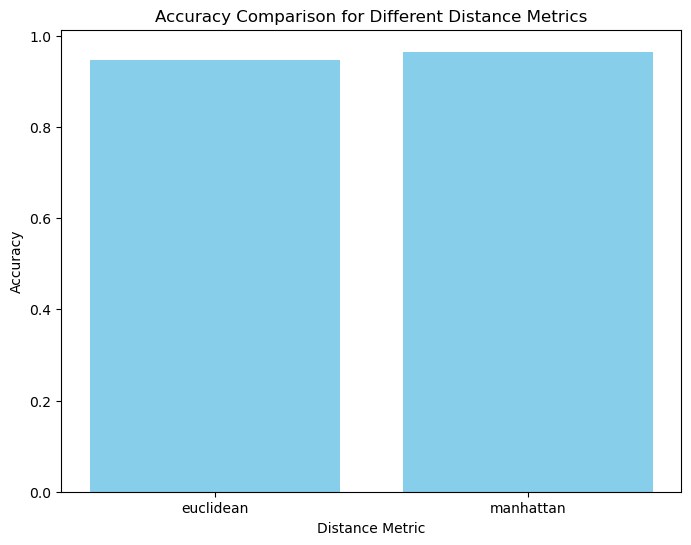

In [21]:
metrics = ['euclidean', 'manhattan']
accuracies = []

for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.bar(metrics, accuracies, color='skyblue')
plt.title('Accuracy Comparison for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.show()